# Vamos a crear un mapa bien prro

## Primero un vistazo a los datos

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# !pip install squarify
import squarify

### Leyendo los datos para el Estado de México

In [10]:
df_edomex = pd.read_csv('data/ageb_mza_urbana_15_cpv2020/conjunto_de_datos/conjunto_de_datos_ageb_urbana_15_cpv2020.csv')
df_edomex

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
0,15,México,0,Total de la entidad México,0,Total de la entidad,0000,0,16992418,8741123,...,2123211,4049493,2561525,1559564,822048,572663,133777,329132,1769551,53857
1,15,México,1,Acambay de Ruíz Castañeda,0,Total del municipio,0000,0,67872,35255,...,1954,13388,2973,2140,393,257,1352,3427,13523,734
2,15,México,1,Acambay de Ruíz Castañeda,1,Total de la localidad urbana,0000,0,5988,3148,...,561,1441,854,677,226,118,55,75,573,10
3,15,México,1,Acambay de Ruíz Castañeda,1,Total AGEB urbana,0127,0,3373,1796,...,360,831,523,427,143,80,33,45,309,5
4,15,México,1,Acambay de Ruíz Castañeda,1,Villa de Acambay de Ruíz Castañeda,0127,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141525,15,México,125,Tonanitla,7,Villas de Tonanitla,0069,44,11,5,...,*,4,5,4,3,4,*,0,0,0
141526,15,México,125,Tonanitla,7,Villas de Tonanitla,0069,45,19,12,...,*,5,5,3,5,*,0,0,0,0
141527,15,México,125,Tonanitla,7,Villas de Tonanitla,0069,46,3,*,...,*,*,*,*,*,*,*,*,*,*
141528,15,México,125,Tonanitla,7,Villas de Tonanitla,0069,47,12,7,...,0,4,*,*,0,0,0,0,*,0


### Hagamos una gráfica para identificar los MUNICIPIOS con mayor cantidad de personas solteras

In [98]:
df_edomex_solt_mun = df_edomex.loc[1:,('NOM_MUN','LOC','NOM_LOC','P_12YMAS_F','P_12YMAS_M','P12YM_SOLT')]
df_edomex_solt_mun

,NOM_MUN,P_12YMAS_F,P_12YMAS_M,P12YM_SOLT
1,Acambay de Ruíz Castañeda,27342,24517,18101
2,Acambay de Ruíz Castañeda,2568,2182,1780
3,Acambay de Ruíz Castañeda,1488,1207,1029
4,Acambay de Ruíz Castañeda,0,0,0
5,Acambay de Ruíz Castañeda,*,*,*
...,...,...,...,...
141525,Tonanitla,5,6,*
141526,Tonanitla,10,5,5
141527,Tonanitla,*,*,*
141528,Tonanitla,5,4,*


### Limpiamos datos perdidos marcados como '*'

In [99]:
df_edomex_solt_mun = df_edomex_solt_mun[df_edomex_solt_mun['P12YM_SOLT'] != '*'].loc[:,('NOM_MUN','P12YM_SOLT')]
df_edomex_solt_mun
#df_edomex_solt_mun['P12YM_SOLT']

,NOM_MUN,P12YM_SOLT
1,Acambay de Ruíz Castañeda,18101
2,Acambay de Ruíz Castañeda,1780
3,Acambay de Ruíz Castañeda,1029
4,Acambay de Ruíz Castañeda,0
6,Acambay de Ruíz Castañeda,8
...,...,...
141521,Tonanitla,4
141522,Tonanitla,3
141524,Tonanitla,5
141526,Tonanitla,5


In [100]:
df_edomex_solt_mun['P12YM_SOLT'].replace('N/D', np.NaN, inplace=True)
df_edomex_solt_mun.dropna(inplace=True)
df_edomex_solt_mun

,NOM_MUN,P12YM_SOLT
1,Acambay de Ruíz Castañeda,18101
2,Acambay de Ruíz Castañeda,1780
3,Acambay de Ruíz Castañeda,1029
4,Acambay de Ruíz Castañeda,0
6,Acambay de Ruíz Castañeda,8
...,...,...
141521,Tonanitla,4
141522,Tonanitla,3
141524,Tonanitla,5
141526,Tonanitla,5


Hacemos cast para convertir a datos de tipo numérico

In [101]:
df_edomex_solt_mun['P12YM_SOLT'] = df_edomex_solt_mun['P12YM_SOLT'].astype(int)

In [102]:
df_edomex_solt_mun.describe()

,P12YM_SOLT
count,133350.000000
mean,131.790446
std,3259.504350
min,0.000000
25%,11.000000
50%,23.000000
75%,46.000000
max,486528.000000


La diferencia en la densidad poblacional entre municipios es muy grande, debemos escoger una métrica más justa en este sentido. La más utilizada es la **tasa poblacional**

In [103]:
# solt_mun_pct = df_edomex_solt_mun.groupby('NOM_MUN').agg({'P12YM_SOLT': 'sum'}).groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
# solt_mun_tot = df_edomex_solt_mun.groupby('NOM_MUN').agg({'P12YM_SOLT': 'sum'}).groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
solt_mun_tot = df_edomex_solt_mun.groupby('NOM_MUN').agg({'P12YM_SOLT': 'sum'}).apply(lambda x: 100 * x / float(x.sum()))
solt_mun_tot.reset_index(inplace=True)
solt_mun_tot

,NOM_MUN,P12YM_SOLT
0,Acambay de Ruíz Castañeda,0.155796
1,Acolman,1.087483
2,Aculco,0.097313
3,Almoloya de Alquisiras,0.037367
4,Almoloya de Juárez,0.683431
...,...,...
120,Zacazonapan,0.020052
121,Zacualpan,0.032878
122,Zinacantepec,1.094499
123,Zumpahuacán,0.049055


In [106]:
over_2_pct = solt_mun_tot[solt_mun_tot['P12YM_SOLT'] >= 2]
over_2_pct

,NOM_MUN,P12YM_SOLT
12,Atizapán de Zaragoza,3.514197
19,Chalco,2.382007
25,Chimalhuacán,4.352873
26,Coacalco de Berriozábal,2.061055
31,Cuautitlán Izcalli,3.754480
33,Ecatepec de Morelos,11.061566
40,Ixtapaluca,3.447116
59,Naucalpan de Juárez,5.652933
61,Nezahualcóyotl,7.660779
62,Nicolás Romero,2.523674


<AxesSubplot:>

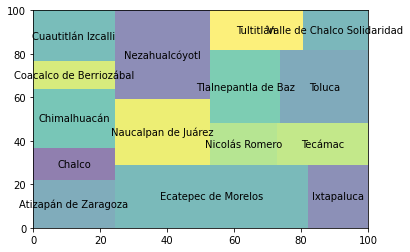

In [107]:
squarify.plot(sizes=over_2_pct['P12YM_SOLT'], label=over_2_pct['NOM_MUN'], alpha=0.6)

,NOM_MUN,P12YM_SOLT
12,Atizapán de Zaragoza,3.514197
19,Chalco,2.382007
25,Chimalhuacán,4.352873
26,Coacalco de Berriozábal,2.061055
31,Cuautitlán Izcalli,3.754480
33,Ecatepec de Morelos,11.061566
40,Ixtapaluca,3.447116
59,Naucalpan de Juárez,5.652933
61,Nezahualcóyotl,7.660779
62,Nicolás Romero,2.523674


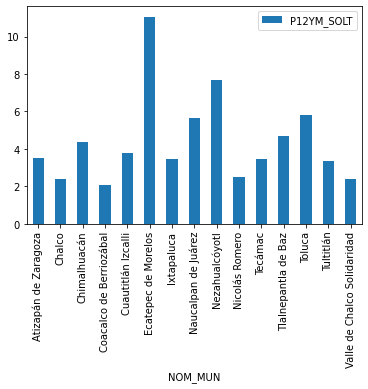

In [109]:
over_2_pct.plot(kind='bar', x='NOM_MUN', y='P12YM_SOLT')
over_2_pct

### Hagamos una gráfica para identificar las LOCALIDADES con mayor cantidad de personas solteras

In [ ]:
df_edomex_solt_loc = df_edomex.loc[:,('NOM_LOC','P_12YMAS_F','P_12YMAS_M','P12YM_SOLT')]
df_edomex_solt_loc

Obteniendo solo las columnas correspondientes a personas solteras mediante regex

In [11]:
df_edomex.filter(regex='SOLT')

,P12YM_SOLT
0,4799091
1,18101
2,1780
3,1029
4,0
...,...
141525,*
141526,5
141527,*
141528,*


Ahora sabemos que solo hay una columna para las personas solteras (de hecho, lo descubrimos mediante el diccionario de datos)

In [22]:
df_ecatepec = df_edomex[df_edomex['NOM_MUN'] == 'Ecatepec de Morelos']
df_ecatepec = df_ecatepec.loc[:,('ENTIDAD','NOM_ENT','MUN','NOM_MUN','LOC','MZA','P_12YMAS_F','P_12YMAS_M','P12YM_SOLT')]
df_ecatepec

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,MZA,P_12YMAS_F,P_12YMAS_M,P12YM_SOLT
28106,15,México,33,Ecatepec de Morelos,0,0,707077,654951,486528
28107,15,México,33,Ecatepec de Morelos,1,0,706388,654304,486097
28108,15,México,33,Ecatepec de Morelos,1,0,17,16,12
28109,15,México,33,Ecatepec de Morelos,1,1,*,*,*
28110,15,México,33,Ecatepec de Morelos,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...
42069,15,México,33,Ecatepec de Morelos,1,4,12,10,10
42070,15,México,33,Ecatepec de Morelos,1,6,10,12,*
42071,15,México,33,Ecatepec de Morelos,1,9,*,*,*
42072,15,México,33,Ecatepec de Morelos,1,10,*,*,*


In [17]:
df_ecatepec.describe()

,ENTIDAD,MUN,LOC,MZA,POBTOT,VIVTOT
count,13968.0,13968.0,13968.000000,13968.000000,1.396800e+04,13968.000000
mean,15.0,33.0,0.999928,24.664734,4.708062e+02,143.887314
std,0.0,0.0,0.008461,24.411256,1.968938e+04,6017.385523
min,15.0,33.0,0.000000,0.000000,0.000000e+00,0.000000
25%,15.0,33.0,1.000000,9.000000,5.100000e+01,16.000000
50%,15.0,33.0,1.000000,20.000000,9.700000e+01,30.000000
75%,15.0,33.0,1.000000,34.000000,1.650000e+02,48.250000
max,15.0,33.0,1.000000,800.000000,1.645352e+06,502825.000000


### Leyendo los datos para la CDMX

In [12]:
df_cdmx = pd.read_csv('data/ageb_mza_urbana_09_cpv2020/conjunto_de_datos/conjunto_de_datos_ageb_urbana_09_cpv2020.csv')
df_cdmx

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
0,9,Ciudad de México,0,Total de la entidad Ciudad de México,0,Total de la entidad,0000,0,9209944,4805017,...,1898265,2536523,2084156,1290811,957162,568827,46172,77272,561128,10528
1,9,Ciudad de México,2,Azcapotzalco,0,Total del municipio,0000,0,432205,227255,...,96128,123961,105899,66399,50965,31801,1661,2869,22687,322
2,9,Ciudad de México,2,Azcapotzalco,1,Total de la localidad urbana,0000,0,432205,227255,...,96128,123961,105899,66399,50965,31801,1661,2869,22687,322
3,9,Ciudad de México,2,Azcapotzalco,1,Total AGEB urbana,0010,0,3183,1695,...,741,772,692,313,221,145,8,14,148,5
4,9,Ciudad de México,2,Azcapotzalco,1,Azcapotzalco,0010,1,159,86,...,45,42,39,18,13,6,*,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68936,9,Ciudad de México,17,Venustiano Carranza,1,Venustiano Carranza,1524,21,106,58,...,23,27,24,12,12,9,0,0,6,0
68937,9,Ciudad de México,17,Venustiano Carranza,1,Venustiano Carranza,1524,22,107,55,...,35,37,34,14,11,11,0,*,5,0
68938,9,Ciudad de México,17,Venustiano Carranza,1,Venustiano Carranza,1524,23,246,116,...,40,68,48,22,12,8,*,*,23,*
68939,9,Ciudad de México,17,Venustiano Carranza,1,Venustiano Carranza,1524,24,158,78,...,30,37,29,16,5,9,0,4,12,0


In [13]:
df_cdmx.filter(regex='SOLT')

,P12YM_SOLT
0,3017529
1,147260
2,147260
3,1148
4,66
...,...
68936,32
68937,30
68938,71
68939,62
